In [ ]:
#|default_exp app

# How To Create a Higging Face Space App

This Notebook creates the files needed to update a HuggingFace Space App

Staps
1. Create Hugging Face Space - this is called demo
2. GIT Clone the space to a local folder
3. Run This Notebook. It imports the model.pkl file and outputs app.py, 3 example jpg files.
4. Download the model.pkl, app.py and example files to the cloned folder
5. Push the files to hugging space

In [ ]:
!pip install -Uqq fastai
!pip install -Uqq fastbook

In [ ]:
!pip install -q gradio

In [ ]:
!pip install -Uqq nbdev

In [ ]:
#nbdev
from nbdev.export import nb_export

# import utilities
import time
import os
import pathlib
import shutil

from pathlib import Path

#Mount Google Drive
from google.colab import drive
drive.mount('/content/drive/', force_remount=True)

Mounted at /content/drive/


In [ ]:
# Change Directory
%cd "/content/drive/MyDrive/Colab Notebooks/FastaiColabNotebooks/Lesson_2/"

/content/drive/MyDrive/Colab Notebooks/FastaiColabNotebooks/Lesson_2


In [ ]:
#%cd '/content/drive/MyDrive/Colab Notebooks/HuggingFaceProjects/Demo'

In [ ]:
#Path to Image Files
HFImgPath = '/content/drive/MyDrive/Colab Notebooks/FastaiCourseData/Lesson_2/bears'


In [ ]:
shutil.copy(HFImgPath + '/grizzly/grizzly-1.jpg', './grizzly-1.jpg')
shutil.copy(HFImgPath + '/black/black-1.jpg', './black-1.jpg')
shutil.copy(HFImgPath + '/teddy/teddy-1.jpg', '/teddy-1.jpg')

'/teddy-1.jpg'

In [ ]:
#|export
from fastai.vision.all import *

import gradio as gr

def is_bear(x): return x[0].isuppoer()

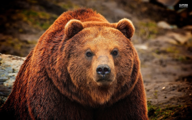

In [ ]:
im = PILImage.create('./grizzly-1.jpg')
im.thumbnail((192,192))
im

In [ ]:
#|export
learn = load_learner('./model.pkl')

In [ ]:
learn.predict(im)

/usr/local/lib/python3.10/dist-packages/fastai/torch_core.py:263: UserWarning: 'has_mps' is deprecated, please use 'torch.backends.mps.is_built()'
  return getattr(torch, 'has_mps', False)


('grizzly', tensor(1), tensor([0.0408, 0.9525, 0.0067]))

In [ ]:
learn.dls.vocab

['black', 'grizzly', 'teddy']

In [ ]:
#|export
categories = learn.dls.vocab
def classify_image(img):
    pred, idx, probs = learn.predict(img)
    return dict(zip(categories, map(float, probs)))

In [ ]:
classify_image(im)

{'black': 0.04077454283833504,
 'grizzly': 0.9525172710418701,
 'teddy': 0.006708228029310703}

In [ ]:
#|export
image = gr.Image(height=192,width=192)
label = gr.Label()
examples = ['./grizzly-1.jpg', './black-1.jpg', './teddy-1.jpg']

intf = gr.Interface(fn=classify_image, inputs=image, outputs=label, examples=examples)
intf.launch(inline=False)

Setting queue=True in a Colab notebook requires sharing enabled. Setting `share=True` (you can turn this off by setting `share=False` in `launch()` explicitly).

Colab notebook detected. To show errors in colab notebook, set debug=True in launch()
Running on public URL: https://f27fae10b1635ff0dd.gradio.live

This share link expires in 72 hours. For free permanent hosting and GPU upgrades, run `gradio deploy` from Terminal to deploy to Spaces (https://huggingface.co/spaces)


In [ ]:
# Export Notebook to python Script -- nbdev --
from nbdev.export import nb_export
nb_export('./BearDetectorApp.ipynb', './')